In [1]:
pip install tensorflow numpy pandas scikit-learn kagglehub

## **Import** **Libraries**

In [2]:
import kagglehub
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


## **Download the Dataset Using kagglehub**

In [3]:
# Download the latest version of the IMDb dataset
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
print("Path to dataset files:", path)


100%|██████████| 25.7M/25.7M [00:00<00:00, 95.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


## **Load the Dataset into a Pandas DataFrame**

In [11]:
import os

# List files in the downloaded directory
print(os.listdir(path))


['IMDB Dataset.csv']


In [13]:
# Correct path to the dataset
dataset_path = f'{path}/IMDB Dataset.csv'

# Load the dataset into a Pandas DataFrame
train_df = pd.read_csv(dataset_path)

# Inspect the dataset
train_df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## **Inspect and Preprocess the Data**

In [14]:
# Check for missing values
print(train_df.isnull().sum())

# Preview the dataset
print(train_df.head())

# For simplicity, use the 'review' and 'sentiment' columns (assuming 'sentiment' is the label)
texts = train_df['review'].values
labels = train_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

# Check the distribution of the labels
print(pd.Series(labels).value_counts())


review       0
sentiment    0
dtype: int64
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
1    25000
0    25000
Name: count, dtype: int64


## **Text Tokenization and Padding**

In [15]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure consistent input size
max_length = 100  # Adjust as needed
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Check the shape of padded sequences
print(padded_sequences.shape)


(50000, 100)


## **Split Data into Training and Validation Sets**

In [16]:
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(X_train.shape, X_val.shape)


(40000, 100) (10000, 100)


## **Build the LSTM Model**

In [27]:
# Build the LSTM model
model = Sequential()

# Embedding layer to convert word indices into dense vectors
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))

# LSTM layer
model.add(LSTM(128, return_sequences=False))

# Dropout for regularization
model.add(Dropout(0.2))

# Output layer (sigmoid for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## **Train the Model**

In [18]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=2)


Epoch 1/5
625/625 - 165s - 263ms/step - accuracy: 0.6637 - loss: 0.6145 - val_accuracy: 0.7338 - val_loss: 0.5616
Epoch 2/5
625/625 - 199s - 319ms/step - accuracy: 0.8188 - loss: 0.4079 - val_accuracy: 0.8367 - val_loss: 0.3659
Epoch 3/5
625/625 - 206s - 330ms/step - accuracy: 0.8767 - loss: 0.3027 - val_accuracy: 0.8438 - val_loss: 0.3559
Epoch 4/5
625/625 - 161s - 258ms/step - accuracy: 0.9055 - loss: 0.2421 - val_accuracy: 0.8417 - val_loss: 0.3868
Epoch 5/5
625/625 - 201s - 321ms/step - accuracy: 0.9331 - loss: 0.1850 - val_accuracy: 0.8259 - val_loss: 0.4254


## **Evaluate the Model**

In [19]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Loss: 0.4254
Validation Accuracy: 0.8259


## **Plot Training History**

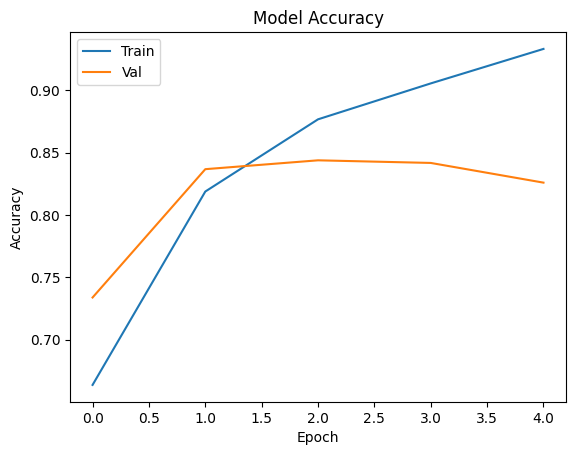

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

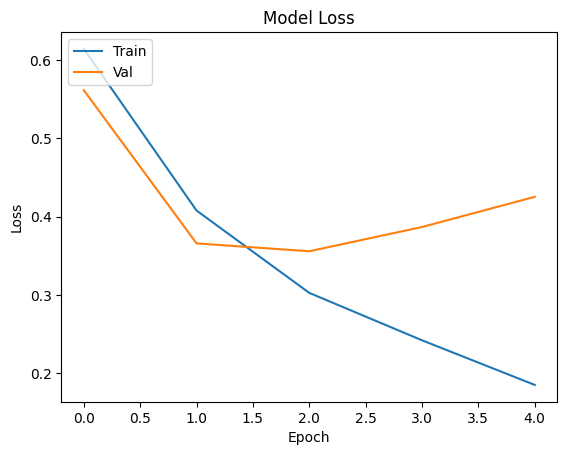

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

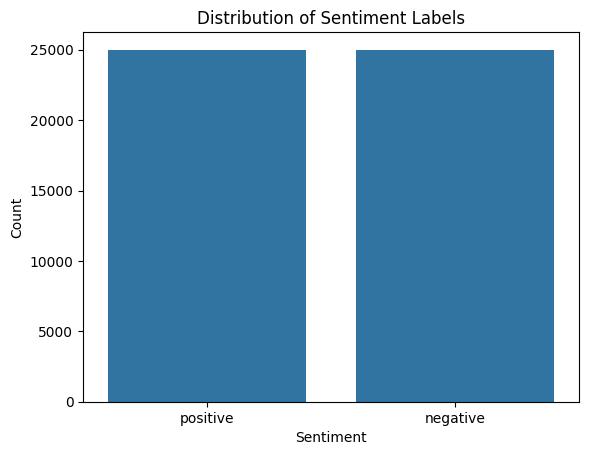

In [24]:
import seaborn as sns

# Count the number of positive and negative reviews
sns.countplot(x='sentiment', data=train_df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


## **Make predictions**

In [22]:
# Example review for prediction
review = ["The movie was absolutely fantastic!"]

# Preprocess the input review
sequence = tokenizer.texts_to_sequences(review)
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

# Predict sentiment (0 = negative, 1 = positive)
prediction = model.predict(padded_sequence)
print("Positive" if prediction >= 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
Positive


## **Example Review and Prediction**

In [23]:
# Example review for prediction
review = ["The movie was absolutely fantastic! I loved every moment of it."]

# Preprocess the input review
sequence = tokenizer.texts_to_sequences(review)  # Convert the review to a sequence of tokens
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')  # Pad the sequence

# Predict sentiment (0 = negative, 1 = positive)
prediction = model.predict(padded_sequence)

# Output the prediction
if prediction >= 0.5:
    print("Prediction: Positive")
else:
    print("Prediction: Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Prediction: Positive
